**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [21]:
# Import packages and check folders
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

# Import class from py file
from q1 import *
from q1e3 import *
from q1e6 import *
from q1e5 import *
from q3 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [22]:
#setting up the model
model = Worker()
model.solve()

We can thereby vertify that it is the optimal labor supply choice, when labor hours is 15.302.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


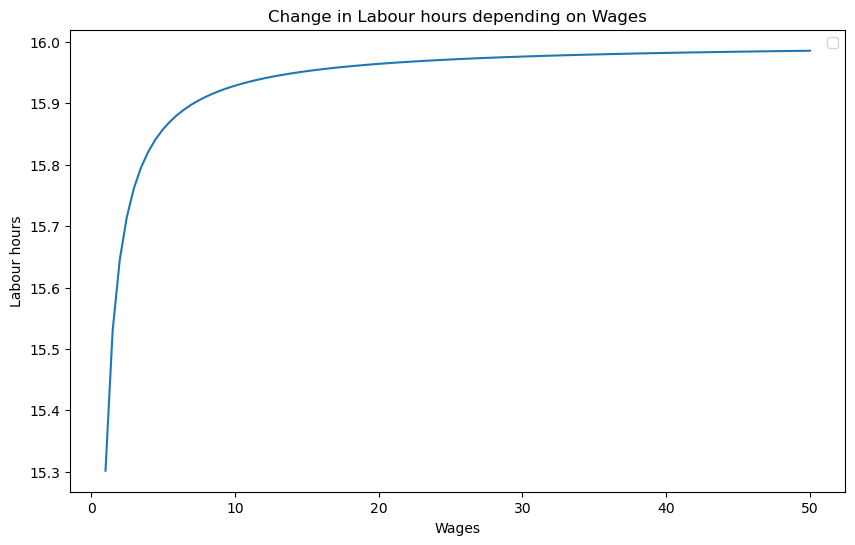

In [23]:
w_vector = np.linspace(1,50,100)
l_vector = []
for i in w_vector:
    model.par.omega = i
    model.solve()
    l_vector.append(model.par.el)

#plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(w_vector, l_vector)
plt.xlabel('Wages')
plt.ylabel('Labour hours')
plt.title('Change in Labour hours depending on Wages')
plt.legend()
plt.show()

It is seen that when wages increases the labor hours increases. Notice that labor hours converges towards 16 hours and do not changes much has the wages becomes above 20.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [24]:
# Setting up and solving the model
model2 = Worker1()

G_vector = []
l_vector = []
u_vector = []
tau_vector = []

G_vector, l_vector, u_vector, tau_vector = model2.solve()

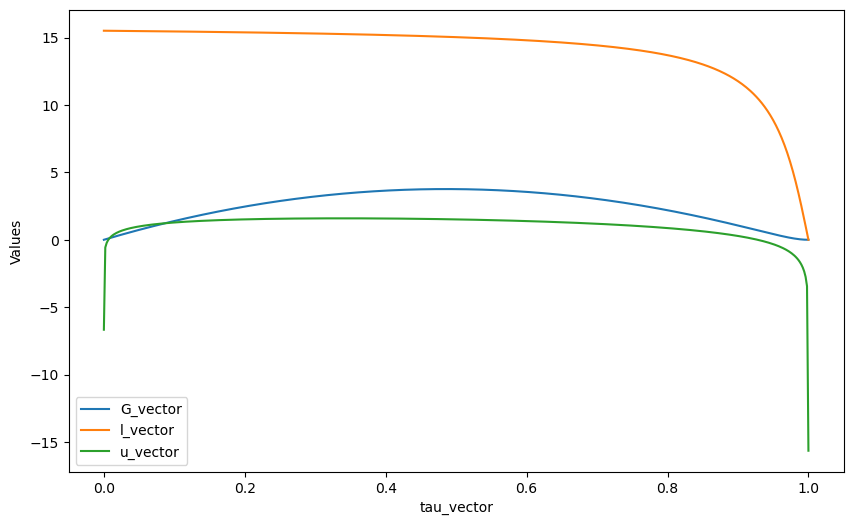

In [25]:
#plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(tau_vector, G_vector, label='G_vector')
plt.plot(tau_vector, l_vector, label='l_vector')
plt.plot(tau_vector, u_vector, label='u_vector')
plt.xlabel('tau_vector')
plt.ylabel('Values')
plt.legend()
plt.show()

It is seen that when taxes increases labor hours decreases. The utility is negative to begin with as the goverment expeses is zero, but it increases as the goverment spendings increases as taxes increases. However, when taxes=1 then the utility will be negative as labor hours and the goverment is zero.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The most optimat tax is: 0.33868, with utility of: 1.59026


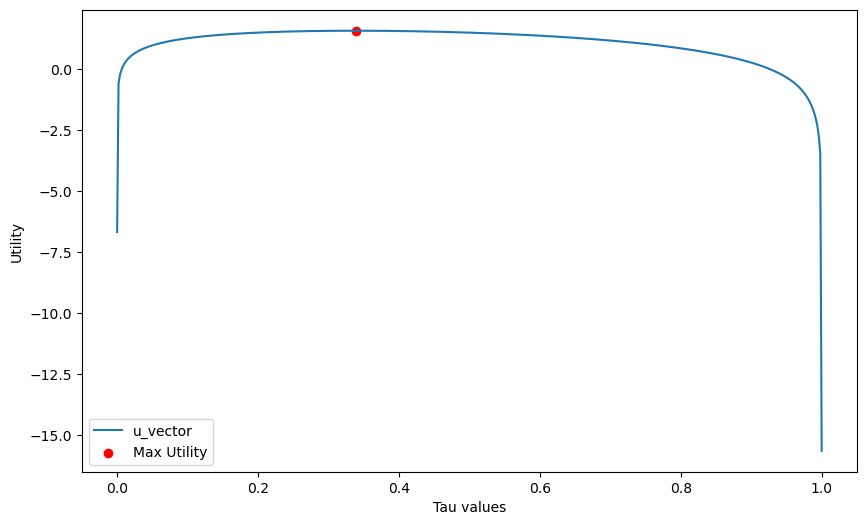

In [26]:
max_index = np.argmax(u_vector)
optimal_tax = tau_vector[max_index]
max_utility = max(u_vector)

print(f'The most optimat tax is: {optimal_tax:6.5f}, with utility of: {max_utility:6.5f}')

plt.figure(figsize=(10, 6))
plt.plot(tau_vector, u_vector, label='u_vector')
plt.scatter(optimal_tax, max_utility, color='red', label='Max Utility')  # Add a dot at the maximum value
plt.xlabel('Tau values')
plt.ylabel('Utility')
plt.legend()
plt.show()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [27]:
model3 = Worker2()

G_vector2 = []
l_vector2 = []
u_vector2 = []
tau_vector2 = []

#It takes slightly longer because we have set a large number of G's to ensure a higher degree of
#reliability for the upcoming chunk
G_vector2, l_vector2, u_vector2, tau_vector2 = model3.solve()

True
The G that fulfills the constraint with a tolerance of: 0.0005 is: 5.166103


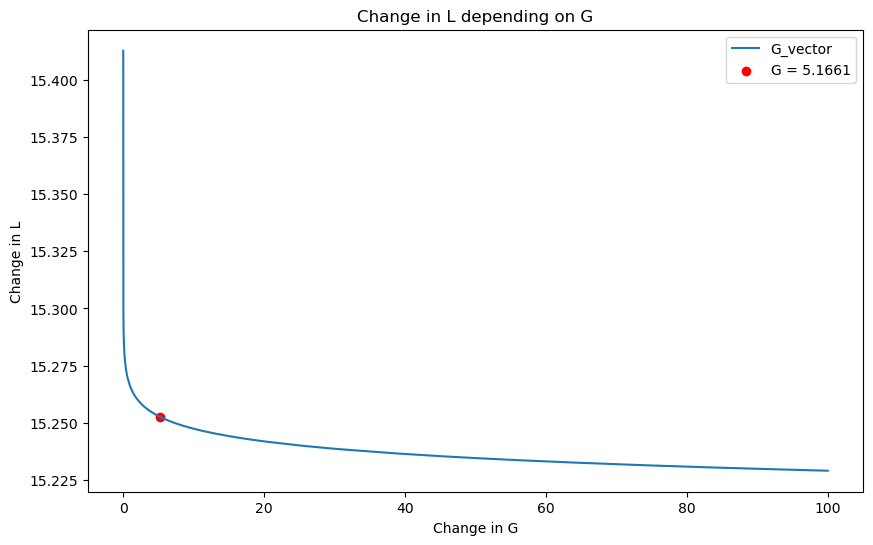

In [28]:
#Brute force. The solution should be a recursive function calling itself to cumpute L*, but we have been unnable
#to set the constraint and implement recursivity to the optimizer.
index = []
tolerance = 0.0005
for j,i in enumerate(G_vector2):
    the_G = model3.par.tau * model3.par.omega * l_vector2[j]
    if math.isclose(the_G,i, abs_tol=tolerance):
        print("True")
        print(f'The G that fulfills the constraint with a tolerance of: {tolerance:6.4f} is: {i:6.6f}')
        #Save the position of this G
        index = j

plt.figure(figsize=(10, 6))
plt.plot(G_vector2, l_vector2, label='G_vector')
plt.xlabel('Change in G')
plt.ylabel('Change in L')
plt.title('Change in L depending on G')
plt.scatter(G_vector2[index], l_vector2[index], color='red', label='G = 5.1661')  # Add a dot at G = 5.21998
#plt.ylim(0, 16)
plt.legend()
plt.show()

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [29]:
model6 = Worker3()

#Since we have been unable to incorporate the constrain, we are going to follow a similar approach as in exercise 5
G_vector6, l_vector6, u_vector6, tau_vector6 = model6.solve()

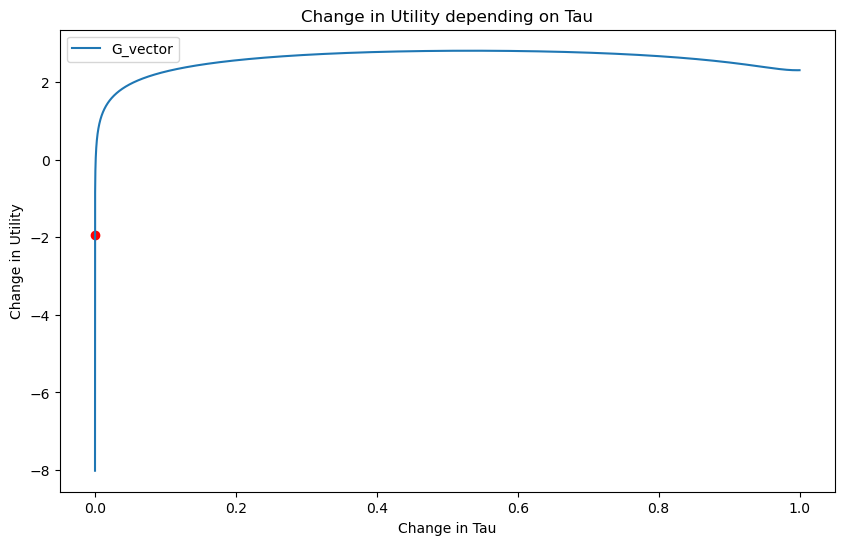

In [41]:
index2 = []
tolerance = 0.002
for x,y in enumerate(G_vector6):
    the_G2 = model6.par.tau[x] * model6.par.omega * l_vector6[x]
    if math.isclose(the_G2,y, abs_tol=tolerance) and x != 0:
        #Save the position
        index2 = x

plt.figure(figsize=(10, 6))
plt.plot(tau_vector6, u_vector6, label='G_vector')
plt.xlabel('Change in Tau')
plt.ylabel('Change in Utility')
plt.title('Change in Utility depending on Tau')
plt.scatter(tau_vector6[index2], u_vector6[index2], color='red')  # Add a dot at G = 5.21998
plt.legend()
plt.show()


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [31]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [32]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [33]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [34]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [35]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [36]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

  23: x0 = (  -1.51,-103.96) -> converged at (  -3.14,-103.62) with f =   2.68812284
  24: x0 = ( -34.08, -31.08) -> converged at ( -31.40, -31.40) with f =   0.49323358
  57: x0 = ( -38.22,   8.02) -> converged at ( -37.68,   6.28) with f =   0.36499286
  61: x0 = (  23.70,  -2.51) -> converged at (  21.98,  -3.14) with f =   0.12330840
 136: x0 = (  -0.32,  12.48) -> converged at (  -0.00,  12.56) with f =   0.03945869
 204: x0 = (  -5.06,   8.06) -> converged at (  -6.28,   6.28) with f =   0.01972934
 282: x0 = (  -5.37,   4.23) -> converged at (  -6.28,   6.28) with f =   0.01972934
 332: x0 = (   3.15,   5.96) -> converged at (   3.14,   3.14) with f =   0.00493234
 389: x0 = (   2.31,  -0.56) -> converged at (  -0.00,  -0.00) with f =   0.00000000
 427: x0 = (   0.12,  -2.43) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration counting warm up 427
Best iteration not counting warm up 417

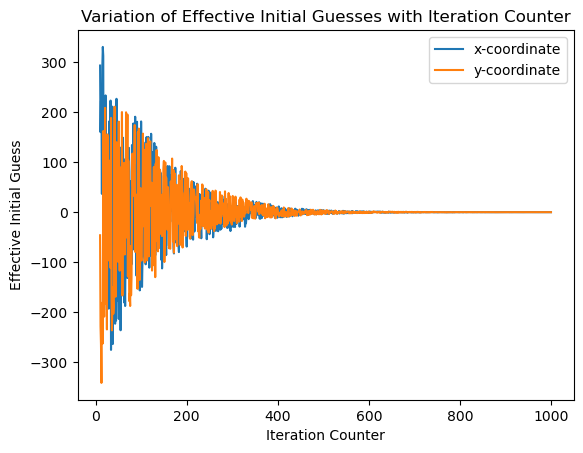

True
True


In [37]:
bounds = [-600, 600]  # Bounds for x1 and x2
tolerance = 1e-8  # Tolerance for convergence
warmup_iterations_list = [10, 100] 
warmup_iterations = 10  # Number of warm-up iterations
max_iterations = 1000  # Maximum number of iterations

result, initial_guesses, best_iteration= refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

x_values = [guess[0] for guess in initial_guesses]  # Extract the x-coordinate from each initial guess
y_values = [guess[1] for guess in initial_guesses]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations, max_iterations), x_values, label='x-coordinate')
plt.plot(range(warmup_iterations, max_iterations), y_values, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

#Check if x & y are close to 0 with a 0.000005 tolerance
x, y = result
print(math.isclose(x, 0, abs_tol= 0.00005))
print(math.isclose(y, 0, abs_tol= 0.00005))

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

 111: x0 = (  53.06, -27.11) -> converged at (  53.38, -28.26) with f =   0.91248211
 185: x0 = ( -15.93,  -7.06) -> converged at ( -15.70,  -9.42) with f =   0.08384971
 280: x0 = (  10.18,  -5.30) -> converged at (   9.42,  -3.14) with f =   0.02466168
 293: x0 = (   2.32,  -1.89) -> converged at (   3.14,  -3.14) with f =   0.00493234
 342: x0 = (  -0.59,  -0.52) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration counting warm up 342
Best iteration not counting warm up 242

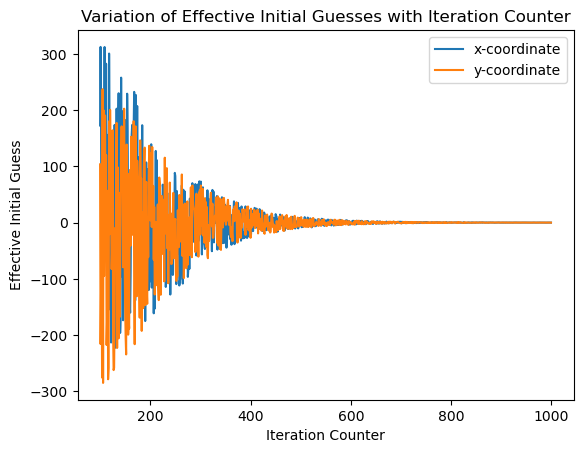

In [38]:
warmup_iterations_100 = 100

result_100, initial_guesses_100, best_iteration_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)

x_values_100 = [guess[0] for guess in initial_guesses_100]  # Extract the x-coordinate from each initial guess
y_values_100 = [guess[1] for guess in initial_guesses_100]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations_100, max_iterations), x_values_100, label='x-coordinate')
plt.plot(range(warmup_iterations_100, max_iterations), y_values_100, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

In [39]:
#Tries is set to 5 to avoid it taking an incredibly long time, but our analysis has been done with tries = 100
tries = 5
all_best_iterations = []
all_best_iterations_100 = []
for i in range(tries):
    result, initial_guesses, best_iteration= refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations, doprint = False)
    result_100, initial_guesses_100, best_iteration_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations, doprint = False)
    #List with all iterations
    all_best_iterations.append(best_iteration)
    all_best_iterations_100.append(best_iteration_100)

In [40]:
#Average with all iterations, including warm up
print(average_list(all_best_iterations))
print(average_list(all_best_iterations_100))
#Average with all iterations, not including warm up
print(average_list(all_best_iterations) - warmup_iterations)
print(average_list(all_best_iterations_100) - warmup_iterations_100)

401.8
445.4
391.8
345.4


By setting K_ to a 100, we increase tenfold the amount of war-up iterations. However, since during these iterations there are no adjustments, they do not improve the speed at which it converges. 

The thing that is keeping us on edge is the fact that, even if when K_ = 100 it, as far as we have been able to observe, always takes more iterations to converge, if we only take into account the iterations after the warm-up, it is not as clear.

To try to decide if it makes a significant difference, the optimization has been done 100 times with both, 10 and 100 warm-up iterations and the mean has been computed. If we were to take all iterations into account, again, K_= 100 is substantially slower. However, the after warm-up iterations show a different picture, with K_ = 100 being faster.
To conduct this test, we have not set any any seed, which means that results can not be exactly replicated. In this case the results are the following:

All iterations (including warm-up)

·Warm-up(10) = 365.08 iterations

·Warm-up(100) = 447.79 iterations

All iterations (no including warm-up)

·Warm-up(10) = 355.08 iterations

·Warm-up(100) = 347.79 iterations
